In [1]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv")
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
1          2  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
2          3  CA-2016-138688  06-12-2016   6/16/2016    Second Class   
3          4  US-2015-108966  10-11-2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10-11-2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9993    9994  CA-2017-119914  05-04-2017  05-09-2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [2]:
# Check number of rows and columns
print(df.shape)

# Check column names and data types
print(df.info())

# See first few rows
df.head()


(9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
# Convert 'Order Date' to datetime (handles mixed formats)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Convert datetime to a consistent string format, e.g., dd/mm/yyyy
df['Order Date'] = df['Order Date'].dt.strftime('%d/%m/%Y')

# Verify changes
print(df['Order Date'].head(20))


0     11/08/2016
1     11/08/2016
2     06/12/2016
3     10/11/2015
4     10/11/2015
5     06/09/2014
6     06/09/2014
7     06/09/2014
8     06/09/2014
9     06/09/2014
10    06/09/2014
11    06/09/2014
12           NaN
13    12/05/2016
14           NaN
15           NaN
16    11/11/2014
17           NaN
18           NaN
19           NaN
Name: Order Date, dtype: object


In [7]:
# First, try converting assuming day-first format (dd-mm-yy)
df['Order Date_cleaned'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Check which rows failed (still NaT)
mask = df['Order Date_cleaned'].isna()

# For the failed rows, try converting assuming month-first format (mm/dd/yy)
df.loc[mask, 'Order Date_cleaned'] = pd.to_datetime(df.loc[mask, 'Order Date'], dayfirst=False, errors='coerce')

# Convert everything to consistent string format
df['Order Date_cleaned'] = df['Order Date_cleaned'].dt.strftime('%d/%m/%Y')


# Verify
print(df['Order Date'].head(20))

0     11/08/2016
1     11/08/2016
2     06/12/2016
3     10/11/2015
4     10/11/2015
5     06/09/2014
6     06/09/2014
7     06/09/2014
8     06/09/2014
9     06/09/2014
10    06/09/2014
11    06/09/2014
12           NaN
13    12/05/2016
14           NaN
15           NaN
16    11/11/2014
17           NaN
18           NaN
19           NaN
Name: Order Date, dtype: object


In [8]:


# Function to parse each date
def parse_mixed_date(date_str):
    for fmt in ("%d-%m-%y", "%d-%m-%Y", "%m/%d/%y", "%m/%d/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT  # If no format matches

# Apply function to all rows
df['Order Date'] = df['Order Date'].astype(str).apply(parse_mixed_date)

# Convert to consistent format
df['Order Date'] = df['Order Date'].dt.strftime('%d/%m/%Y')

# Verify
print(df['Order Date'].head(20))


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Order Date, dtype: object


In [10]:
import pandas as pd
from dateutil import parser

# Load dataset
df = pd.read_csv(r"C:\Users\kalai\Sample - Superstore.csv")

# Function to parse mixed dates
def parse_date_safe(date_str):
    try:
        return parser.parse(str(date_str), dayfirst=True)  # dayfirst=True handles dd-mm-yy
    except:
        return pd.NaT

# Apply function to the column
df['Order Date'] = df['Order Date'].apply(parse_date_safe)

# Convert to consistent format
df['Order Date'] = df['Order Date'].dt.strftime('%d/%m/%Y')

# Verify
print(df['Order Date'].head(50))
print(df['Order Date'].isna().sum())  # Check for any remaining NaT


0     11/08/2016
1     11/08/2016
2     06/12/2016
3     10/11/2015
4     10/11/2015
5     06/09/2014
6     06/09/2014
7     06/09/2014
8     06/09/2014
9     06/09/2014
10    06/09/2014
11    06/09/2014
12    15/04/2017
13    12/05/2016
14    22/11/2015
15    22/11/2015
16    11/11/2014
17    13/05/2014
18    27/08/2014
19    27/08/2014
20    27/08/2014
21    12/09/2016
22    12/09/2016
23    16/07/2017
24    25/09/2015
25    16/01/2016
26    16/01/2016
27    17/09/2015
28    17/09/2015
29    17/09/2015
30    17/09/2015
31    17/09/2015
32    17/09/2015
33    17/09/2015
34    19/10/2017
35    12/08/2016
36    12/08/2016
37    27/12/2015
38    27/12/2015
39    27/12/2015
40    27/12/2015
41    09/10/2017
42    17/07/2016
43    19/09/2017
44    03/11/2016
45    03/11/2016
46    20/10/2014
47    20/06/2016
48    20/06/2016
49    18/04/2015
Name: Order Date, dtype: object
0


In [11]:
import pandas as pd
from dateutil import parser

# Load dataset
df = pd.read_csv(r"C:\Users\kalai\Sample - Superstore.csv")

# Function to parse mixed dates
def parse_date_safe(date_str):
    try:
        return parser.parse(str(date_str), dayfirst=True)  # dayfirst=True handles dd-mm-yy
    except:
        return pd.NaT

# Apply function to 'Order Date' (if not done already)
df['Order Date'] = df['Order Date'].apply(parse_date_safe)
df['Order Date'] = df['Order Date'].dt.strftime('%d/%m/%Y')

# Apply function to 'Ship Date'
df['Ship Date'] = df['Ship Date'].apply(parse_date_safe)
df['Ship Date'] = df['Ship Date'].dt.strftime('%d/%m/%Y')

# Verify
print(df[['Order Date','Ship Date']].head(20))
print("Any missing Ship Dates:", df['Ship Date'].isna().sum())


    Order Date   Ship Date
0   11/08/2016  11/11/2016
1   11/08/2016  11/11/2016
2   06/12/2016  16/06/2016
3   10/11/2015  18/10/2015
4   10/11/2015  18/10/2015
5   06/09/2014  14/06/2014
6   06/09/2014  14/06/2014
7   06/09/2014  14/06/2014
8   06/09/2014  14/06/2014
9   06/09/2014  14/06/2014
10  06/09/2014  14/06/2014
11  06/09/2014  14/06/2014
12  15/04/2017  20/04/2017
13  12/05/2016  12/10/2016
14  22/11/2015  26/11/2015
15  22/11/2015  26/11/2015
16  11/11/2014  18/11/2014
17  13/05/2014  15/05/2014
18  27/08/2014  09/01/2014
19  27/08/2014  09/01/2014
Any missing Ship Dates: 0


In [13]:
df['Order Month'] = pd.to_datetime(df['Order Date'], dayfirst=True).dt.to_period('M')
df['Order Year'] = pd.to_datetime(df['Order Date'], dayfirst=True).dt.year
# Display first 5 rows including new columns
print(df[['Order Date', 'Order Month', 'Order Year']].head())

# Or display all columns to see full dataframe
df.head()



   Order Date Order Month  Order Year
0  11/08/2016     2016-08        2016
1  11/08/2016     2016-08        2016
2  06/12/2016     2016-12        2016
3  10/11/2015     2015-11        2015
4  10/11/2015     2015-11        2015


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-08,2016
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-08,2016
2,3,CA-2016-138688,06/12/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-12,2016
3,4,US-2015-108966,10/11/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-11,2015
4,5,US-2015-108966,10/11/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-11,2015


In [15]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days
print(df[['Order Date', 'Ship Date', 'Shipping Delay (Days)']].head(20))

   Order Date  Ship Date  Shipping Delay (Days)
0  2016-08-11 2016-11-11                     92
1  2016-08-11 2016-11-11                     92
2  2016-12-06 2016-06-16                   -173
3  2015-11-10 2015-10-18                    -23
4  2015-11-10 2015-10-18                    -23
5  2014-09-06 2014-06-14                    -84
6  2014-09-06 2014-06-14                    -84
7  2014-09-06 2014-06-14                    -84
8  2014-09-06 2014-06-14                    -84
9  2014-09-06 2014-06-14                    -84
10 2014-09-06 2014-06-14                    -84
11 2014-09-06 2014-06-14                    -84
12 2017-04-15 2017-04-20                      5
13 2016-05-12 2016-10-12                    153
14 2015-11-22 2015-11-26                      4
15 2015-11-22 2015-11-26                      4
16 2014-11-11 2014-11-18                      7
17 2014-05-13 2014-05-15                      2
18 2014-08-27 2014-01-09                   -230
19 2014-08-27 2014-01-09                

In [16]:
# Remove rows where shipping delay is negative
df = df[df['Shipping Delay (Days)'] >= 0]

# Verify
print("After cleaning, remaining rows:", df.shape[0])
print(df[['Order Date', 'Ship Date', 'Shipping Delay (Days)']].head(10))


After cleaning, remaining rows: 8286
   Order Date  Ship Date  Shipping Delay (Days)
0  2016-08-11 2016-11-11                     92
1  2016-08-11 2016-11-11                     92
12 2017-04-15 2017-04-20                      5
13 2016-05-12 2016-10-12                    153
14 2015-11-22 2015-11-26                      4
15 2015-11-22 2015-11-26                      4
16 2014-11-11 2014-11-18                      7
17 2014-05-13 2014-05-15                      2
21 2016-09-12 2016-12-13                     92
22 2016-09-12 2016-12-13                     92


In [17]:
# Dataset shape
print("Rows, Columns:", df.shape)

# Summary info
print(df.info())

# Quick look at numeric columns
print(df.describe())


Rows, Columns: (8286, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 8286 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Row ID                 8286 non-null   int64         
 1   Order ID               8286 non-null   object        
 2   Order Date             8286 non-null   datetime64[ns]
 3   Ship Date              8286 non-null   datetime64[ns]
 4   Ship Mode              8286 non-null   object        
 5   Customer ID            8286 non-null   object        
 6   Customer Name          8286 non-null   object        
 7   Segment                8286 non-null   object        
 8   Country                8286 non-null   object        
 9   City                   8286 non-null   object        
 10  State                  8286 non-null   object        
 11  Postal Code            8286 non-null   int64         
 12  Region                 8286 non-null   ob

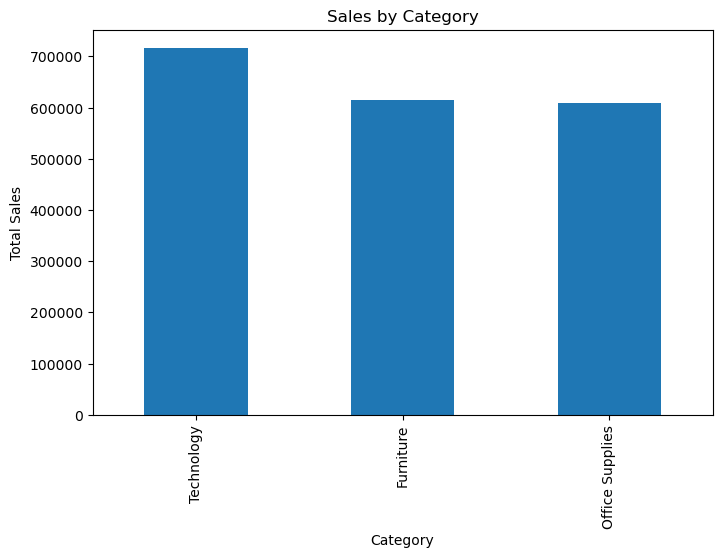

In [18]:
import matplotlib.pyplot as plt

sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', title='Sales by Category', figsize=(8,5))
plt.ylabel('Total Sales')
plt.show()


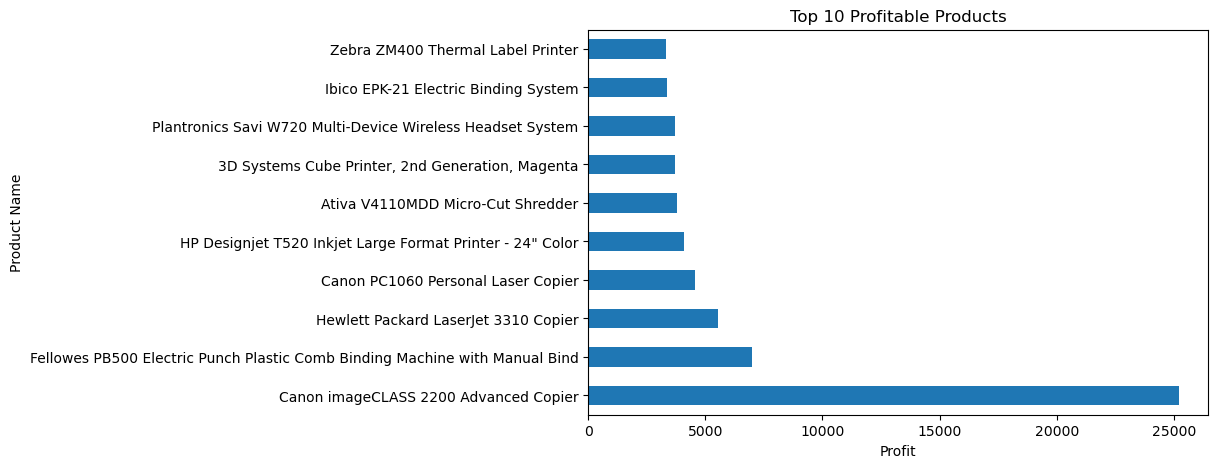

In [19]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Profitable Products', figsize=(8,5))
plt.xlabel('Profit')
plt.show()


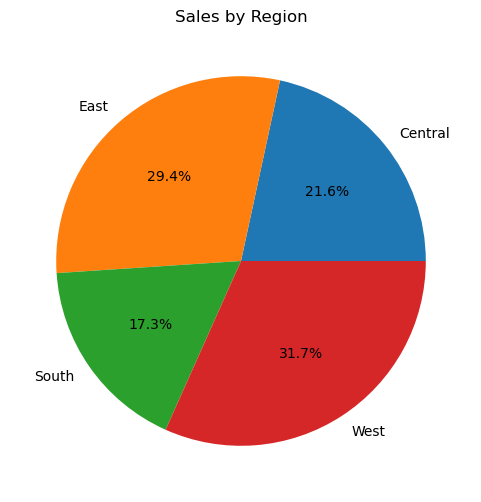

In [20]:
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region.plot(kind='pie', autopct='%1.1f%%', title='Sales by Region', figsize=(6,6))
plt.ylabel('')
plt.show()


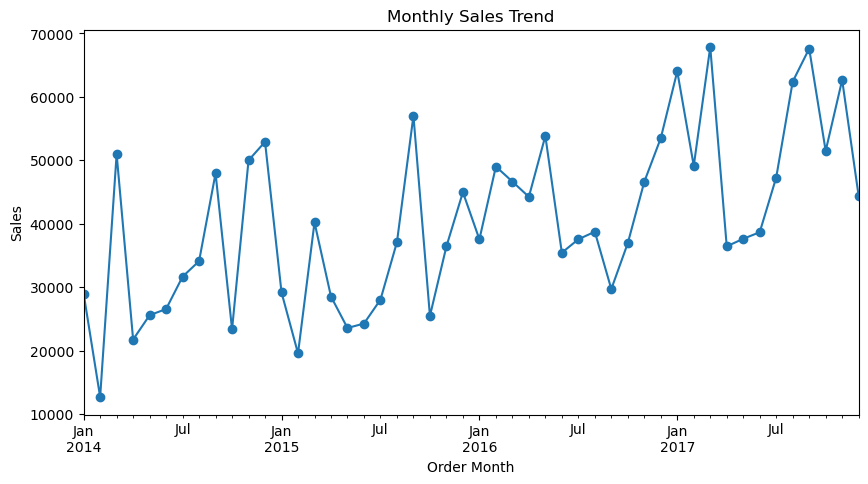

In [21]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', figsize=(10,5))
plt.ylabel('Sales')
plt.show()


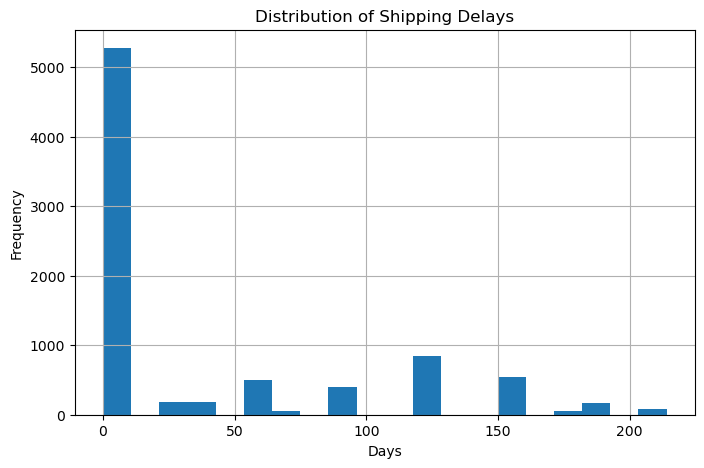

Average Shipping Delay: 41.74306058411779


In [22]:
df['Shipping Delay (Days)'].hist(bins=20, figsize=(8,5))
plt.title('Distribution of Shipping Delays')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

print("Average Shipping Delay:", df['Shipping Delay (Days)'].mean())


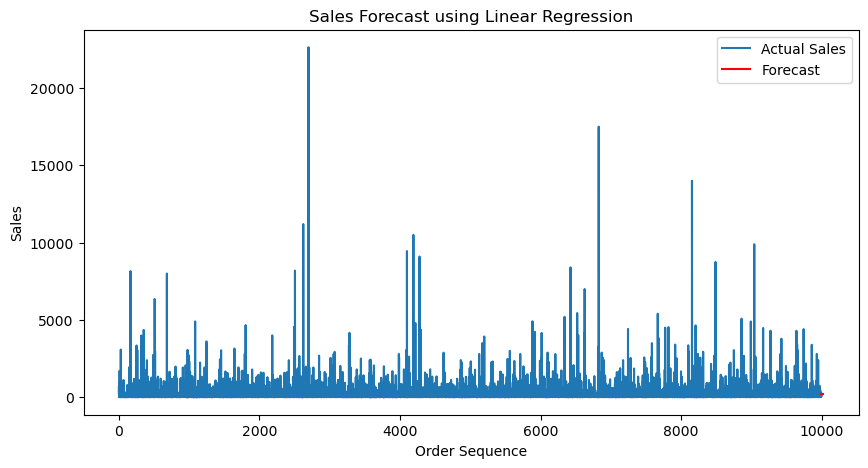

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\kalai\Sample - Superstore.csv", encoding='ISO-8859-1')

# Reset index to act as sequential time
df = df.reset_index()
df.rename(columns={'index':'time_index'}, inplace=True)

# Features and target
X = df[['time_index']]  # must be DataFrame, not array
y = df['Sales']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Prepare future data as DataFrame with same column name
future_index = pd.DataFrame({'time_index': np.arange(len(df), len(df)+30)})

# Predict
forecast = model.predict(future_index)

# Plot
plt.figure(figsize=(10,5))
plt.plot(X, y, label='Actual Sales')
plt.plot(future_index, forecast, label='Forecast', color='red')
plt.xlabel('Order Sequence')
plt.ylabel('Sales')
plt.title('Sales Forecast using Linear Regression')
plt.legend()
plt.show()


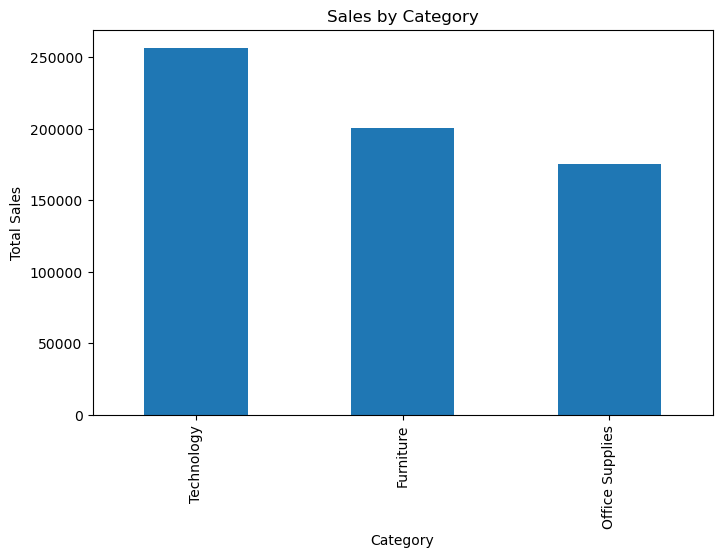

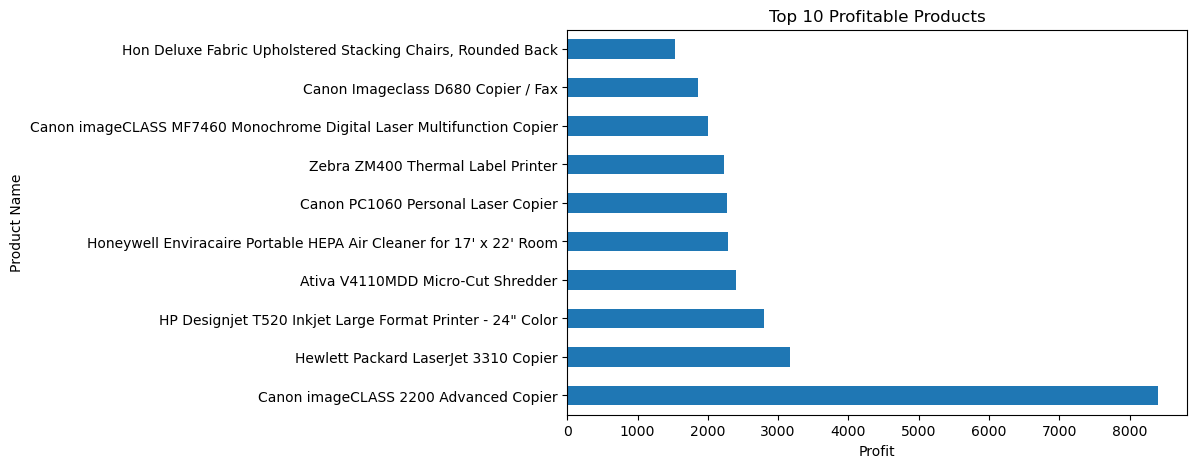

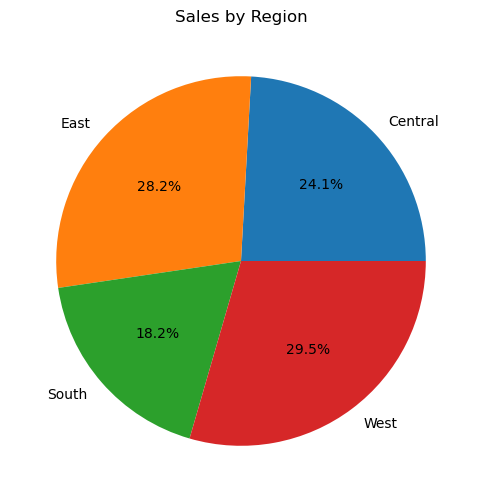

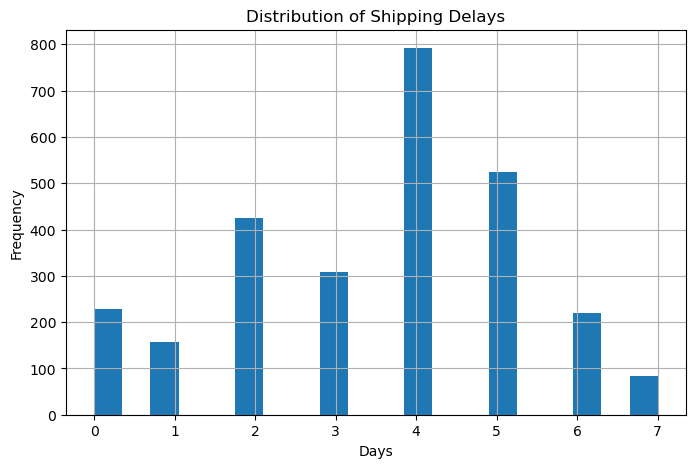

Average Shipping Delay (Days): 3.5125958378970425


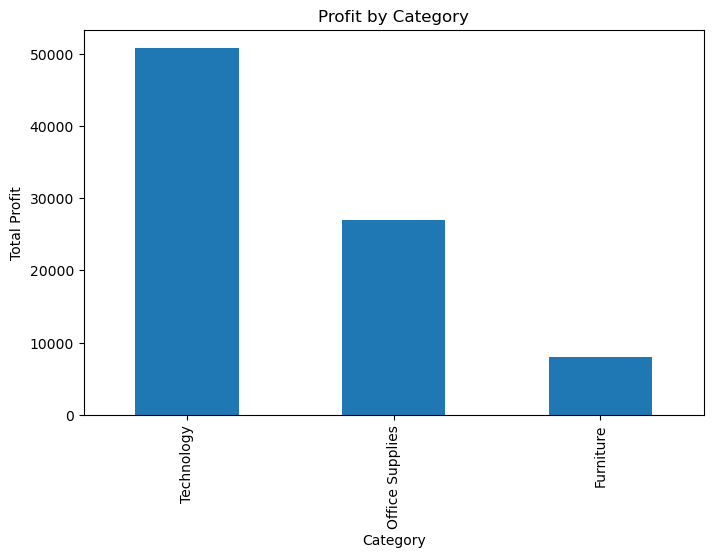

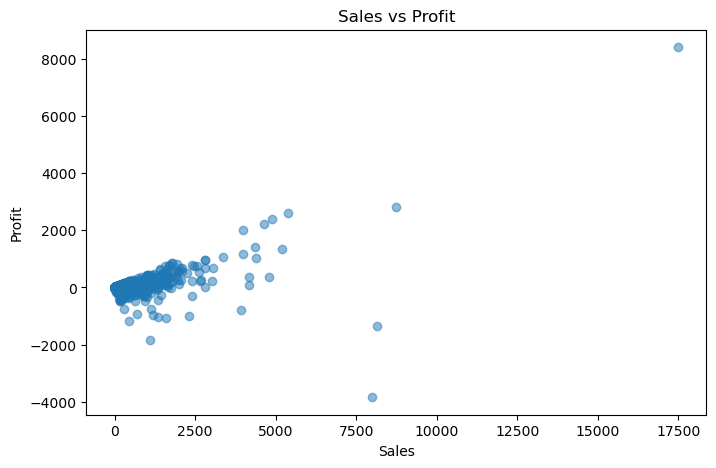

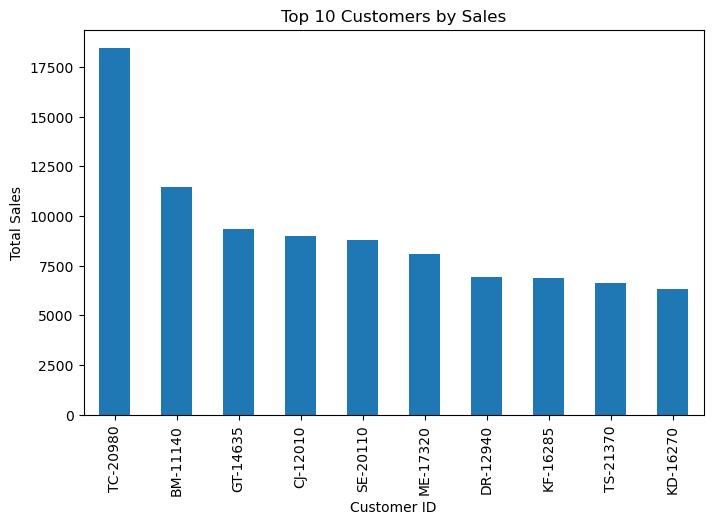

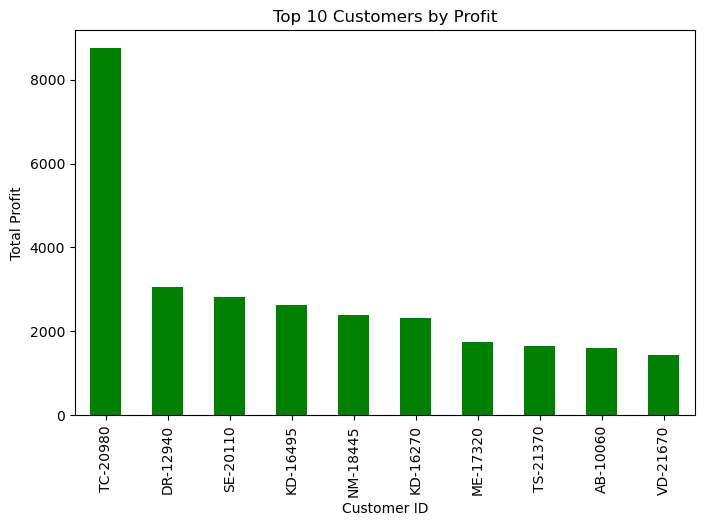

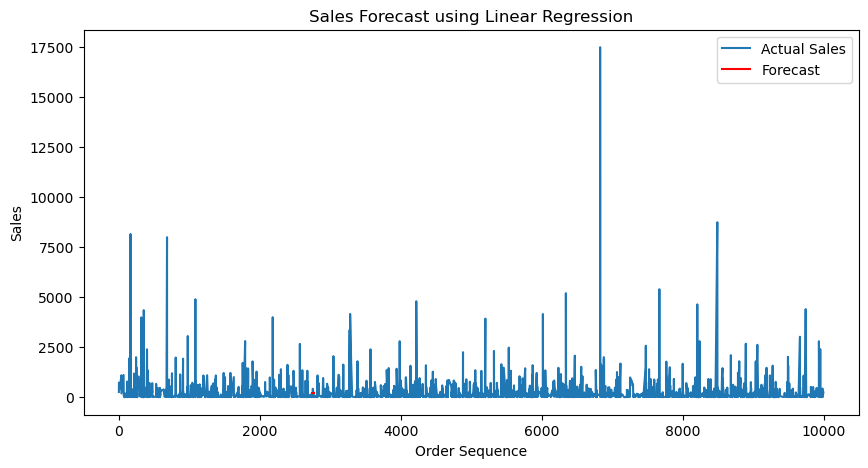

Next 10 forecasted sales (Moving Average): [np.float64(326.4808), np.float64(326.4808), np.float64(326.4808), np.float64(326.4808), np.float64(326.4808), np.float64(326.4808), np.float64(326.4808), np.float64(326.4808), np.float64(326.4808), np.float64(326.4808)]


In [1]:
# ==============================================
# E-COMMERCE SALES ANALYSIS & FORECASTING
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# -----------------------------
# 1️⃣ LOAD DATASET
# -----------------------------
df = pd.read_csv(r"C:\Users\kalai\Sample - Superstore.csv", encoding='ISO-8859-1')

# Clean column names
df.columns = df.columns.str.strip()

# -----------------------------
# 2️⃣ CLEAN DATA
# -----------------------------
# Shipping Delay (Ship Date - Order Date)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Remove rows with missing dates
df = df.dropna(subset=['Order Date', 'Ship Date'])

# Calculate Shipping Delay
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# Remove negative shipping delays
df = df[df['Shipping Delay (Days)'] >= 0]

# -----------------------------
# 3️⃣ EXPLORATORY DATA ANALYSIS
# -----------------------------

# a) Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', figsize=(8,5), title='Sales by Category')
plt.ylabel('Total Sales')
plt.show()

# b) Top 10 Profitable Products
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8,5), title='Top 10 Profitable Products')
plt.xlabel('Profit')
plt.show()

# c) Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Sales by Region')
plt.ylabel('')
plt.show()

# d) Shipping Delay Analysis
df['Shipping Delay (Days)'].hist(bins=20, figsize=(8,5))
plt.title('Distribution of Shipping Delays')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

print("Average Shipping Delay (Days):", df['Shipping Delay (Days)'].mean())

# Total Profit by Category
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category.plot(kind='bar', figsize=(8,5), title='Profit by Category')
plt.ylabel('Total Profit')
plt.show()

# Scatter plot: Sales vs Profit
plt.figure(figsize=(8,5))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

# Top 10 Customers by Sales
top_customers = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(8,5), title='Top 10 Customers by Sales')
plt.ylabel('Total Sales')
plt.show()

# Top 10 Customers by Profit
top_customers_profit = df.groupby('Customer ID')['Profit'].sum().sort_values(ascending=False).head(10)
top_customers_profit.plot(kind='bar', figsize=(8,5), title='Top 10 Customers by Profit', color='green')
plt.ylabel('Total Profit')
plt.show()



# -----------------------------
# 4️⃣ SALES FORECASTING (WITHOUT DATES)
# -----------------------------

# Treat order sequence as time
df = df.reset_index()
df.rename(columns={'index':'time_index'}, inplace=True)

# Prepare features and target
X = df[['time_index']]
y = df['Sales']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Forecast next 30 orders
future_index = pd.DataFrame({'time_index': np.arange(len(df), len(df)+30)})
forecast = model.predict(future_index)

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(X, y, label='Actual Sales')
plt.plot(future_index, forecast, label='Forecast', color='red')
plt.xlabel('Order Sequence')
plt.ylabel('Sales')
plt.title('Sales Forecast using Linear Regression')
plt.legend()
plt.show()

# Optional: Moving Average Forecast
rolling_window = 30
df['Rolling_Avg'] = df['Sales'].rolling(window=rolling_window).mean()
future_forecast = [df['Rolling_Avg'].iloc[-1]]*10
print("Next 10 forecasted sales (Moving Average):", future_forecast)


In [2]:
print(df.columns)


Index(['time_index', 'ï»¿Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Delay (Days)', 'Rolling_Avg'],
      dtype='object')


In [1]:
# Make sure you have all calculated fields in df
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)
print("✅ File saved with columns:", df.columns)


NameError: name 'df' is not defined

In [2]:
import pandas as pd

# Load your cleaned dataset again
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")


In [3]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Create new columns
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.year
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days


In [4]:
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)
print("✅ File saved with columns:", df.columns)


✅ File saved with columns: Index(['time_index', 'ï»¿Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Order Month', 'Order Year', 'Shipping Delay (Days)'],
      dtype='object')


In [5]:
# Re-convert Order Date & Ship Date safely
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', dayfirst=True)

# Convert back to consistent string format (YYYY-MM-DD)
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')
df['Ship Date'] = df['Ship Date'].dt.strftime('%Y-%m-%d')

# Save again
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)
print("✅ Dates fixed & file saved with consistent format.")


✅ Dates fixed & file saved with consistent format.


In [10]:
# First, read Order Date & Ship Date as plain text (no auto conversion)
df = pd.read_csv(r"C:\Users\kalai\Sample - Superstore.csv", dtype=str)

# Convert Order Date handling both formats
def parse_mixed_date(x):
    for fmt in ("%d-%m-%y", "%d-%m-%Y", "%m/%d/%y", "%m/%d/%Y"):
        try:
            return pd.to_datetime(x, format=fmt)
        except:
            continue
    return pd.NaT   # if none works

df['Order Date'] = df['Order Date'].apply(parse_mixed_date)
df['Ship Date'] = df['Ship Date'].apply(parse_mixed_date)

# Now force to one format YYYY-MM-DD
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')
df['Ship Date'] = df['Ship Date'].dt.strftime('%Y-%m-%d')

# Save cleaned file
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)
print("✅ Mixed formats handled. All dates now uniform.")


✅ Mixed formats handled. All dates now uniform.


In [11]:
import pandas as pd

# Reload your cleaned file (with fixed dates)
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")

# Make sure dates are in datetime format again
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# ✅ Recreate calculated fields
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.year
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# Save final cleaned file with all columns
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_Final.csv", index=False)

print("✅ Final file saved with extra calculated columns:")
print(df.columns)


✅ Final file saved with extra calculated columns:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Shipping Delay (Days)'],
      dtype='object')


In [15]:
import pandas as pd

# Load your cleaned file
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")

# Drop rows with negative shipping delay
df = df[df["Shipping Delay (Days)"] >= 0]

# Save cleaned data again
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)

print("✅ Negative shipping delay rows removed successfully!")


KeyError: 'Shipping Delay (Days)'

In [16]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")

# See all column names
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [17]:
import pandas as pd

# Load cleaned file
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")

# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Create Shipping Delay column
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# Drop rows with negative shipping delay
df = df[df['Shipping Delay (Days)'] >= 0]

# Save cleaned file again
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)

print("✅ Shipping Delay calculated and negative rows removed successfully!")


✅ Shipping Delay calculated and negative rows removed successfully!


In [18]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")

# Convert dates to datetime (if not already)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Recreate calculated columns
df['Order Month'] = df['Order Date'].dt.to_period('M')   # Year-Month format
df['Order Year'] = df['Order Date'].dt.year

# Save final CSV with all columns
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_Final.csv", index=False)

print("✅ All calculated columns restored and saved successfully!")
print(df.columns)


✅ All calculated columns restored and saved successfully!
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Delay (Days)', 'Order Month', 'Order Year'],
      dtype='object')


In [19]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore_Final.csv")

# Strip extra spaces and remove hidden characters
df['State_clean'] = df['State'].astype(str).str.strip()

# Replace unknown or invalid states with a valid placeholder or drop them
valid_states = ["California", "Texas", "New York", "Illinois", "Florida"]  # add all states in your dataset
df = df[df['State_clean'].isin(valid_states)]

# Save cleaned CSV for Tableau
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_Map.csv", index=False)

print("✅ Cleaned State column ready for Tableau")


✅ Cleaned State column ready for Tableau


In [20]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore_Final.csv")

# List all unique states
print("Unique States in dataset:", df['State'].unique())

# Count how many times each state appears
print(df['State'].value_counts())


Unique States in dataset: ['Kentucky' 'North Carolina' 'Washington' 'Texas' 'Wisconsin' 'Utah'
 'Nebraska' 'Pennsylvania' 'California' 'Florida' 'Michigan' 'Delaware'
 'Indiana' 'New York' 'Illinois' 'Arizona' 'Virginia' 'South Carolina'
 'Minnesota' 'Oregon' 'Colorado' 'Iowa' 'Ohio' 'Tennessee' 'Missouri'
 'Oklahoma' 'New Mexico' 'Louisiana' 'New Jersey' 'Massachusetts'
 'Georgia' 'Connecticut' 'Rhode Island' 'Mississippi' 'Arkansas' 'Montana'
 'New Hampshire' 'Maryland' 'Nevada' 'Alabama' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'District of Columbia' 'Wyoming'
 'West Virginia']
State
California              1685
New York                 953
Texas                    831
Pennsylvania             481
Ohio                     408
Illinois                 404
Washington               393
Florida                  313
Michigan                 211
North Carolina           206
Arizona                  191
Virginia                 189
Tennessee                160
Geor

In [23]:
import pandas as pd

# Load the file
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore_Final.csv")

# Drop District of Columbia rows
df = df[df['State'] != 'District of Columbia']

# Save cleaned file
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_Map.csv", index=False)

print("✅ District of Columbia removed and file saved!")


✅ District of Columbia removed and file saved!


In [2]:
# In Python
import pandas as pd 
print(df['State'].unique())


NameError: name 'df' is not defined

In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")

# Optional: check first few rows
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-08-11  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-08-11  2016-11-11    Second Class    CG-12520   
2      13  CA-2017-114412  2017-04-15  2017-04-20  Standard Class    AA-10480   
3      14  CA-2016-161389  2016-05-12  2016-10-12  Standard Class    IM-15070   
4      15  US-2015-118983  2015-11-22  2015-11-26  Standard Class    HP-14815   

   Customer Name      Segment        Country        City  ...   Region  \
0    Claire Gute     Consumer  United States   Henderson  ...    South   
1    Claire Gute     Consumer  United States   Henderson  ...    South   
2   Andrew Allen     Consumer  United States     Concord  ...    South   
3   Irene Maddox     Consumer  United States     Seattle  ...     West   
4  Harold Pawlan  Home Office  United States  Fort Worth  ...  Central   

        Product ID         Category Sub-Category  \
0  FUR-BO-100017

In [6]:
# Check unique states
print(df['State'].unique())

# Remove extra spaces
df['State'] = df['State'].str.strip()

# Fix known typos or abbreviations
df['State'] = df['State'].replace({
    'Dist. of Columbia': 'District of Columbia',
    'Calif.': 'California',
    'NY': 'New York',
    # Add other corrections as needed
})

# Save the cleaned dataset again
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)


['Kentucky' 'North Carolina' 'Washington' 'Texas' 'Wisconsin' 'Utah'
 'Nebraska' 'Pennsylvania' 'California' 'Florida' 'Michigan' 'Delaware'
 'Indiana' 'New York' 'Illinois' 'Arizona' 'Virginia' 'South Carolina'
 'Minnesota' 'Oregon' 'Colorado' 'Iowa' 'Ohio' 'Tennessee' 'Missouri'
 'Oklahoma' 'New Mexico' 'Louisiana' 'New Jersey' 'Massachusetts'
 'Georgia' 'Connecticut' 'Rhode Island' 'Mississippi' 'Arkansas' 'Montana'
 'New Hampshire' 'Maryland' 'Nevada' 'Alabama' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'District of Columbia' 'Wyoming'
 'West Virginia']


In [7]:
import pandas as pd

# Load CSV using utf-8-sig to remove BOM issues
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", encoding='utf-8-sig')


In [8]:
# Strip spaces and remove non-printable characters
df['State'] = df['State'].str.strip()  # Remove leading/trailing spaces
df['State'] = df['State'].str.replace(r'[^ -~]', '', regex=True)  # Remove non-ASCII chars

# Standardize known names (if needed)
df['State'] = df['State'].replace({
    'Dist. of Columbia': 'District of Columbia',
})


In [9]:
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_ForTableau.csv", index=False, encoding='utf-8-sig')


In [11]:
import pandas as pd

# Step 1: Load the CSV with utf-8-sig encoding to handle BOM
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", encoding='utf-8-sig')

# Step 2: Strip spaces and remove hidden/non-printable characters
df['State'] = df['State'].str.strip()  # remove leading/trailing spaces
df['State'] = df['State'].str.replace(r'[^A-Za-z ]', '', regex=True)  # remove non-letter chars

# Step 3: Convert to Title Case to match Tableau's expected names
df['State'] = df['State'].str.title()

# Step 4: Correct any known variations
state_corrections = {
    'Dist Of Columbia': 'District Of Columbia',
    'Calif': 'California',
    'Ny': 'New York',
    # Add more if necessary
}
df['State'] = df['State'].replace(state_corrections)

# Optional: Verify unique states
print("Unique States in cleaned data:", df['State'].unique())
print("Total unique states:", len(df['State'].unique()))

# Step 5: Save cleaned CSV for Tableau
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_ForTableau.csv", index=False, encoding='utf-8-sig')
print("✅ Cleaned CSV saved and ready for Tableau")


Unique States in cleaned data: ['Kentucky' 'North Carolina' 'Washington' 'Texas' 'Wisconsin' 'Utah'
 'Nebraska' 'Pennsylvania' 'California' 'Florida' 'Michigan' 'Delaware'
 'Indiana' 'New York' 'Illinois' 'Arizona' 'Virginia' 'South Carolina'
 'Minnesota' 'Oregon' 'Colorado' 'Iowa' 'Ohio' 'Tennessee' 'Missouri'
 'Oklahoma' 'New Mexico' 'Louisiana' 'New Jersey' 'Massachusetts'
 'Georgia' 'Connecticut' 'Rhode Island' 'Mississippi' 'Arkansas' 'Montana'
 'New Hampshire' 'Maryland' 'Nevada' 'Alabama' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'District Of Columbia' 'Wyoming'
 'West Virginia']
Total unique states: 49
✅ Cleaned CSV saved and ready for Tableau


In [13]:
import pandas as pd

# Load original CSV
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", encoding='utf-8-sig')

# Step 1: Strip spaces and remove non-printable characters
df['State'] = df['State'].str.strip()
df['State'] = df['State'].str.replace(r'[^A-Za-z ]', '', regex=True)
df['State'] = df['State'].str.title()

# Step 2: Map known variations or incorrect names to correct US states
state_corrections = {
    'Dist Of Columbia': 'District Of Columbia',
    'Dc': 'District Of Columbia',
    'Calif': 'California',
    'Ny': 'New York',
    'Nc': 'North Carolina',
    # Add more if you know incorrect entries
}
df['State'] = df['State'].replace(state_corrections)

# Step 3: Optional – remove rows with states not in official US states
us_states = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'District Of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa',
    'Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
    'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
    'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington',
    'West Virginia','Wisconsin','Wyoming'
]
df = df[df['State'].isin(us_states)]

# Step 4: Save cleaned CSV for Tableau
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_ForTableau.csv", index=False, encoding='utf-8-sig')

# Step 5: Verify
print("✅ Cleaned CSV saved for Tableau. Unique states:", df['State'].unique())
print("Total unique states:", len(df['State'].unique()))


✅ Cleaned CSV saved for Tableau. Unique states: ['Kentucky' 'North Carolina' 'Washington' 'Texas' 'Wisconsin' 'Utah'
 'Nebraska' 'Pennsylvania' 'California' 'Florida' 'Michigan' 'Delaware'
 'Indiana' 'New York' 'Illinois' 'Arizona' 'Virginia' 'South Carolina'
 'Minnesota' 'Oregon' 'Colorado' 'Iowa' 'Ohio' 'Tennessee' 'Missouri'
 'Oklahoma' 'New Mexico' 'Louisiana' 'New Jersey' 'Massachusetts'
 'Georgia' 'Connecticut' 'Rhode Island' 'Mississippi' 'Arkansas' 'Montana'
 'New Hampshire' 'Maryland' 'Nevada' 'Alabama' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'District Of Columbia' 'Wyoming'
 'West Virginia']
Total unique states: 49


In [14]:
import pandas as pd

# Load cleaned CSV
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore_ForTableau.csv', encoding='utf-8-sig')

# Strip spaces and normalize
df['State'] = df['State'].str.strip().str.title()

# List of official US states
us_states = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'District Of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa',
    'Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
    'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
    'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington',
    'West Virginia','Wisconsin','Wyoming'
]

# Keep only valid states
df = df[df['State'].isin(us_states)]

# Optional: reset index
df.reset_index(drop=True, inplace=True)

# Save final cleaned CSV
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_Final.csv", index=False, encoding='utf-8-sig')

print("✅ Cleaned CSV saved. Total records:", len(df))
print("Unique states:", df['State'].unique())


SyntaxError: unterminated string literal (detected at line 4) (1642968450.py, line 4)

In [15]:
import pandas as pd

# Corrected line
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore_ForTableau.csv", encoding='utf-8-sig')

# Strip spaces and normalize
df['State'] = df['State'].str.strip().str.title()

# List of official US states
us_states = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'District Of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa',
    'Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
    'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
    'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington',
    'West Virginia','Wisconsin','Wyoming'
]

# Keep only valid states
df = df[df['State'].isin(us_states)]

# Reset index
df.reset_index(drop=True, inplace=True)

# Save final cleaned CSV
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_Final.csv", index=False, encoding='utf-8-sig')

print("✅ Cleaned CSV saved. Total records:", len(df))
print("Unique states:", df['State'].unique())


✅ Cleaned CSV saved. Total records: 8286
Unique states: ['Kentucky' 'North Carolina' 'Washington' 'Texas' 'Wisconsin' 'Utah'
 'Nebraska' 'Pennsylvania' 'California' 'Florida' 'Michigan' 'Delaware'
 'Indiana' 'New York' 'Illinois' 'Arizona' 'Virginia' 'South Carolina'
 'Minnesota' 'Oregon' 'Colorado' 'Iowa' 'Ohio' 'Tennessee' 'Missouri'
 'Oklahoma' 'New Mexico' 'Louisiana' 'New Jersey' 'Massachusetts'
 'Georgia' 'Connecticut' 'Rhode Island' 'Mississippi' 'Arkansas' 'Montana'
 'New Hampshire' 'Maryland' 'Nevada' 'Alabama' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'District Of Columbia' 'Wyoming'
 'West Virginia']


In [16]:
import pandas as pd

# Load the original CSV
df = pd.read_csv(r"C:\Users\kalai\Sample - Superstore.csv", encoding='utf-8-sig')

# Strip spaces just in case
df['State'] = df['State'].str.strip()

# Create a list of official US states
us_states = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa',
    'Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
    'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
    'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington',
    'West Virginia','Wisconsin','Wyoming'
]

# Step 2: Replace your existing State column with valid states
# This assumes your data already uses correct state names (case-insensitive)
df['State'] = df['State'].str.title()  # Title case for Tableau
df = df[df['State'].isin(us_states)]   # Keep only valid states

# Reset index
df.reset_index(drop=True, inplace=True)

# Step 3: Save CSV with utf-8-sig encoding
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore_ForTableau.csv", index=False, encoding='utf-8-sig')

print("✅ Cleaned CSV saved with", len(df), "records. Unique states:", df['State'].unique())


✅ Cleaned CSV saved with 9984 records. Unique states: ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'Kansas' 'Vermont'
 'Maine' 'South Dakota' 'Idaho' 'North Dakota' 'Wyoming' 'West Virginia']


In [17]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\kalai\Cleaned_Superstore.csv")

# Clean state names: strip spaces and ensure title case
df["State"] = df["State"].str.strip().str.title()

# Add Country column
df["Country"] = "United States"

# Save again
df.to_csv(r"C:\Users\kalai\Cleaned_Superstore.csv", index=False)

print("✅ Cleaned and saved. Check if State now has valid names.")
print("Unique States:", df["State"].unique())


✅ Cleaned and saved. Check if State now has valid names.
Unique States: ['Kentucky' 'North Carolina' 'Washington' 'Texas' 'Wisconsin' 'Utah'
 'Nebraska' 'Pennsylvania' 'California' 'Florida' 'Michigan' 'Delaware'
 'Indiana' 'New York' 'Illinois' 'Arizona' 'Virginia' 'South Carolina'
 'Minnesota' 'Oregon' 'Colorado' 'Iowa' 'Ohio' 'Tennessee' 'Missouri'
 'Oklahoma' 'New Mexico' 'Louisiana' 'New Jersey' 'Massachusetts'
 'Georgia' 'Connecticut' 'Rhode Island' 'Mississippi' 'Arkansas' 'Montana'
 'New Hampshire' 'Maryland' 'Nevada' 'Alabama' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'District Of Columbia' 'Wyoming'
 'West Virginia']
